**The Problem**

Auto insurance industry is witnessing a paradigm shift. Since auto insurance is a homogenous good (difficult to differentiate product A from product B), companies are fighting a price war. On top of that, distribution channel is shifting more from traditional insurance brokers to online purchase. This means that ability for companies to interact through human touch point is limited and customer should be quoted a good price. A good price quote is one which makes customer purchase the policy and helps the company to increase the profits.
Also, the insurance premium is calculated based on more than 50+ parameters. This means that traditional business analytics-based algorithms are now limited in their ability to differentiate among customers based on subtle parameters.

**Goal**

Build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year


**Importing the required Packages**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

**Read the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train(1).csv to train(1).csv


In [ ]:
data = pd.read_csv('train(1).csv')
data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


**Looking at all the columns in the dataset (name wise)**

In [ ]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In the dataset,

_bin - indicates binary features

_cat - indicates categorical features and 

the rest of the featues are either continuous or ordinal.


In [ ]:
from collections import Counter
Counter(data.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

integer datatype (int64) includes binary, categorical and oridnal features

float datatype  (float64) inlcudes the continuous features

In [ ]:
data_float = data.select_dtypes(include=['float64'])
data_int = data.select_dtypes(include=['int64'])

In [ ]:
print(data_float.info())
print('---------------------------------------')
print(data_int.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ps_reg_01   595212 non-null  float64
 1   ps_reg_02   595212 non-null  float64
 2   ps_reg_03   595212 non-null  float64
 3   ps_car_12   595212 non-null  float64
 4   ps_car_13   595212 non-null  float64
 5   ps_car_14   595212 non-null  float64
 6   ps_car_15   595212 non-null  float64
 7   ps_calc_01  595212 non-null  float64
 8   ps_calc_02  595212 non-null  float64
 9   ps_calc_03  595212 non-null  float64
dtypes: float64(10)
memory usage: 45.4 MB
None
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 49 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id              595212 non-null  int64
 1   target          595212 non-null  int64
 2   ps_ind

Null values have been classifed as -1 in the dataset

**Replace value of -1.0 which is actually a missing value by NaN**

In [ ]:
data_float = data_float.replace(-1,np.nan)
data_int  = data_int.replace(-1,np.nan)

Counting number of features which has got Null values in it and fill in those missing values.

In [ ]:
print(data_float.isnull().sum())
print('--------------------------------------------------')
print(data_int.isnull().sum())

ps_reg_01          0
ps_reg_02          0
ps_reg_03     107772
ps_car_12          1
ps_car_13          0
ps_car_14      42620
ps_car_15          0
ps_calc_01         0
ps_calc_02         0
ps_calc_03         0
dtype: int64
--------------------------------------------------
id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_car_01_cat        107
ps_car_02_cat          0
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
p

There are a total of 12 features which contains missing values

Float Null Features : ps_reg_03 | ps_car_12 | ps_car_14

Integer Null features : ps_ind_02_cat | ps_ind_04_cat | ps_ind_05_cat | ps_car_01_cat | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_11

**Fill all the missing Values**

Checking all the different elements of all the features as it becomes easier to fill in the missing values according to the elements present in the columns.

In [ ]:
for i in range(0,59):
  print(data.columns[i] , data[data.columns[i]].unique())

id [      7       9      13 ... 1488017 1488021 1488027]
target [0 1]
ps_ind_01 [2 1 5 0 4 3 6 7]
ps_ind_02_cat [ 2  1  4  3 -1]
ps_ind_03 [ 5  7  9  2  0  4  3  1 11  6  8 10]
ps_ind_04_cat [ 1  0 -1]
ps_ind_05_cat [ 0  1  4  3  6  5 -1  2]
ps_ind_06_bin [0 1]
ps_ind_07_bin [1 0]
ps_ind_08_bin [0 1]
ps_ind_09_bin [0 1]
ps_ind_10_bin [0 1]
ps_ind_11_bin [0 1]
ps_ind_12_bin [0 1]
ps_ind_13_bin [0 1]
ps_ind_14 [0 1 2 3 4]
ps_ind_15 [11  3 12  8  9  6 13  4 10  5  7  2  0  1]
ps_ind_16_bin [0 1]
ps_ind_17_bin [1 0]
ps_ind_18_bin [0 1]
ps_reg_01 [0.7 0.8 0.  0.9 0.6 0.5 0.4 0.3 0.2 0.1]
ps_reg_02 [0.2 0.4 0.  0.6 1.8 0.1 0.7 1.4 0.9 0.3 0.5 0.8 1.  1.3 1.6 1.5 1.2 1.1
 1.7]
ps_reg_03 [ 0.71807033  0.76607767 -1.         ...  1.60078106  1.63075903
  1.74355958]
ps_car_01_cat [10 11  7  6  9  5  4  8  3  0  2  1 -1]
ps_car_02_cat [1 0]
ps_car_03_cat [-1  0  1]
ps_car_04_cat [0 1 8 9 2 6 3 7 4 5]
ps_car_05_cat [ 1 -1  0]
ps_car_06_cat [ 4 11 14 13  6 15  3  0  1 10 12  9 17  7  8  5  2 16]
p

Filling all the missing values in columns which contains integer data types by the previous value using the method of 'pad'

In [ ]:
data_int.update(data_int[['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_05_cat','ps_car_07_cat','ps_car_09_cat','ps_car_11']].fillna(method='pad'))

Filling all the missing values in columns which contains float data types using the method of mean

In [ ]:
data_float['ps_reg_03'] = data_float['ps_reg_03'].fillna(data_float['ps_reg_03'].mean())
data_float['ps_car_12'] = data_float['ps_car_12'].fillna(data_float['ps_car_12'].mean())
data_float['ps_car_14'] = data_float['ps_car_14'].fillna(data_float['ps_car_14'].mean())


Fillng missing values of one column 'ps_car_03_cat' using 'mode' as still there is a presence of missing value in the column

In [ ]:
data_int['ps_car_03_cat'].mode()

0    1.0
dtype: float64

In [ ]:
data_int['ps_car_03_cat'] =data_int['ps_car_03_cat'].fillna(1.0)

**Checking whether all the missing values have been replaced or not**

In [ ]:
print(data_float.isnull().sum())
print('----------------------------------------------')
print(data_int.isnull().sum())

ps_reg_01     0
ps_reg_02     0
ps_reg_03     0
ps_car_12     0
ps_car_13     0
ps_car_14     0
ps_car_15     0
ps_calc_01    0
ps_calc_02    0
ps_calc_03    0
dtype: int64
----------------------------------------------
id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0


 **Imbalance distribution**

In [ ]:
a = data.groupby('target').size()


In [ ]:
(a[0]/a.sum())*100

96.3552482140817

In [ ]:
(a[1]/a.sum())*100

3.6447517859182947

The Dataset is Highly Imbalanced. i.e 96.355 : 3.644 (imbalance distribution between class 0 and class 1 data points)



In [ ]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.00000

**Correlation Matrix**

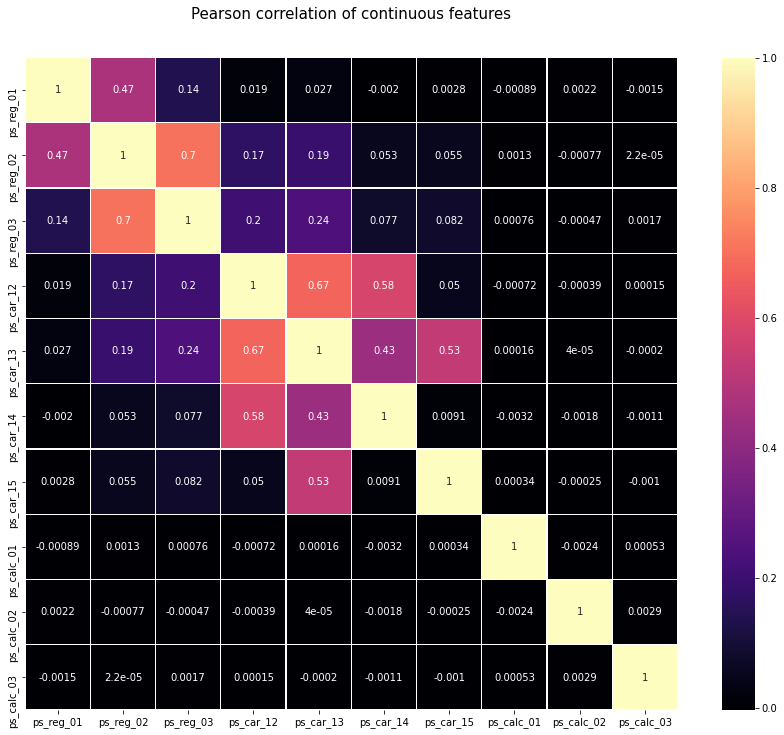

In [ ]:
import seaborn as sns
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(data_float.corr(method='pearson'),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

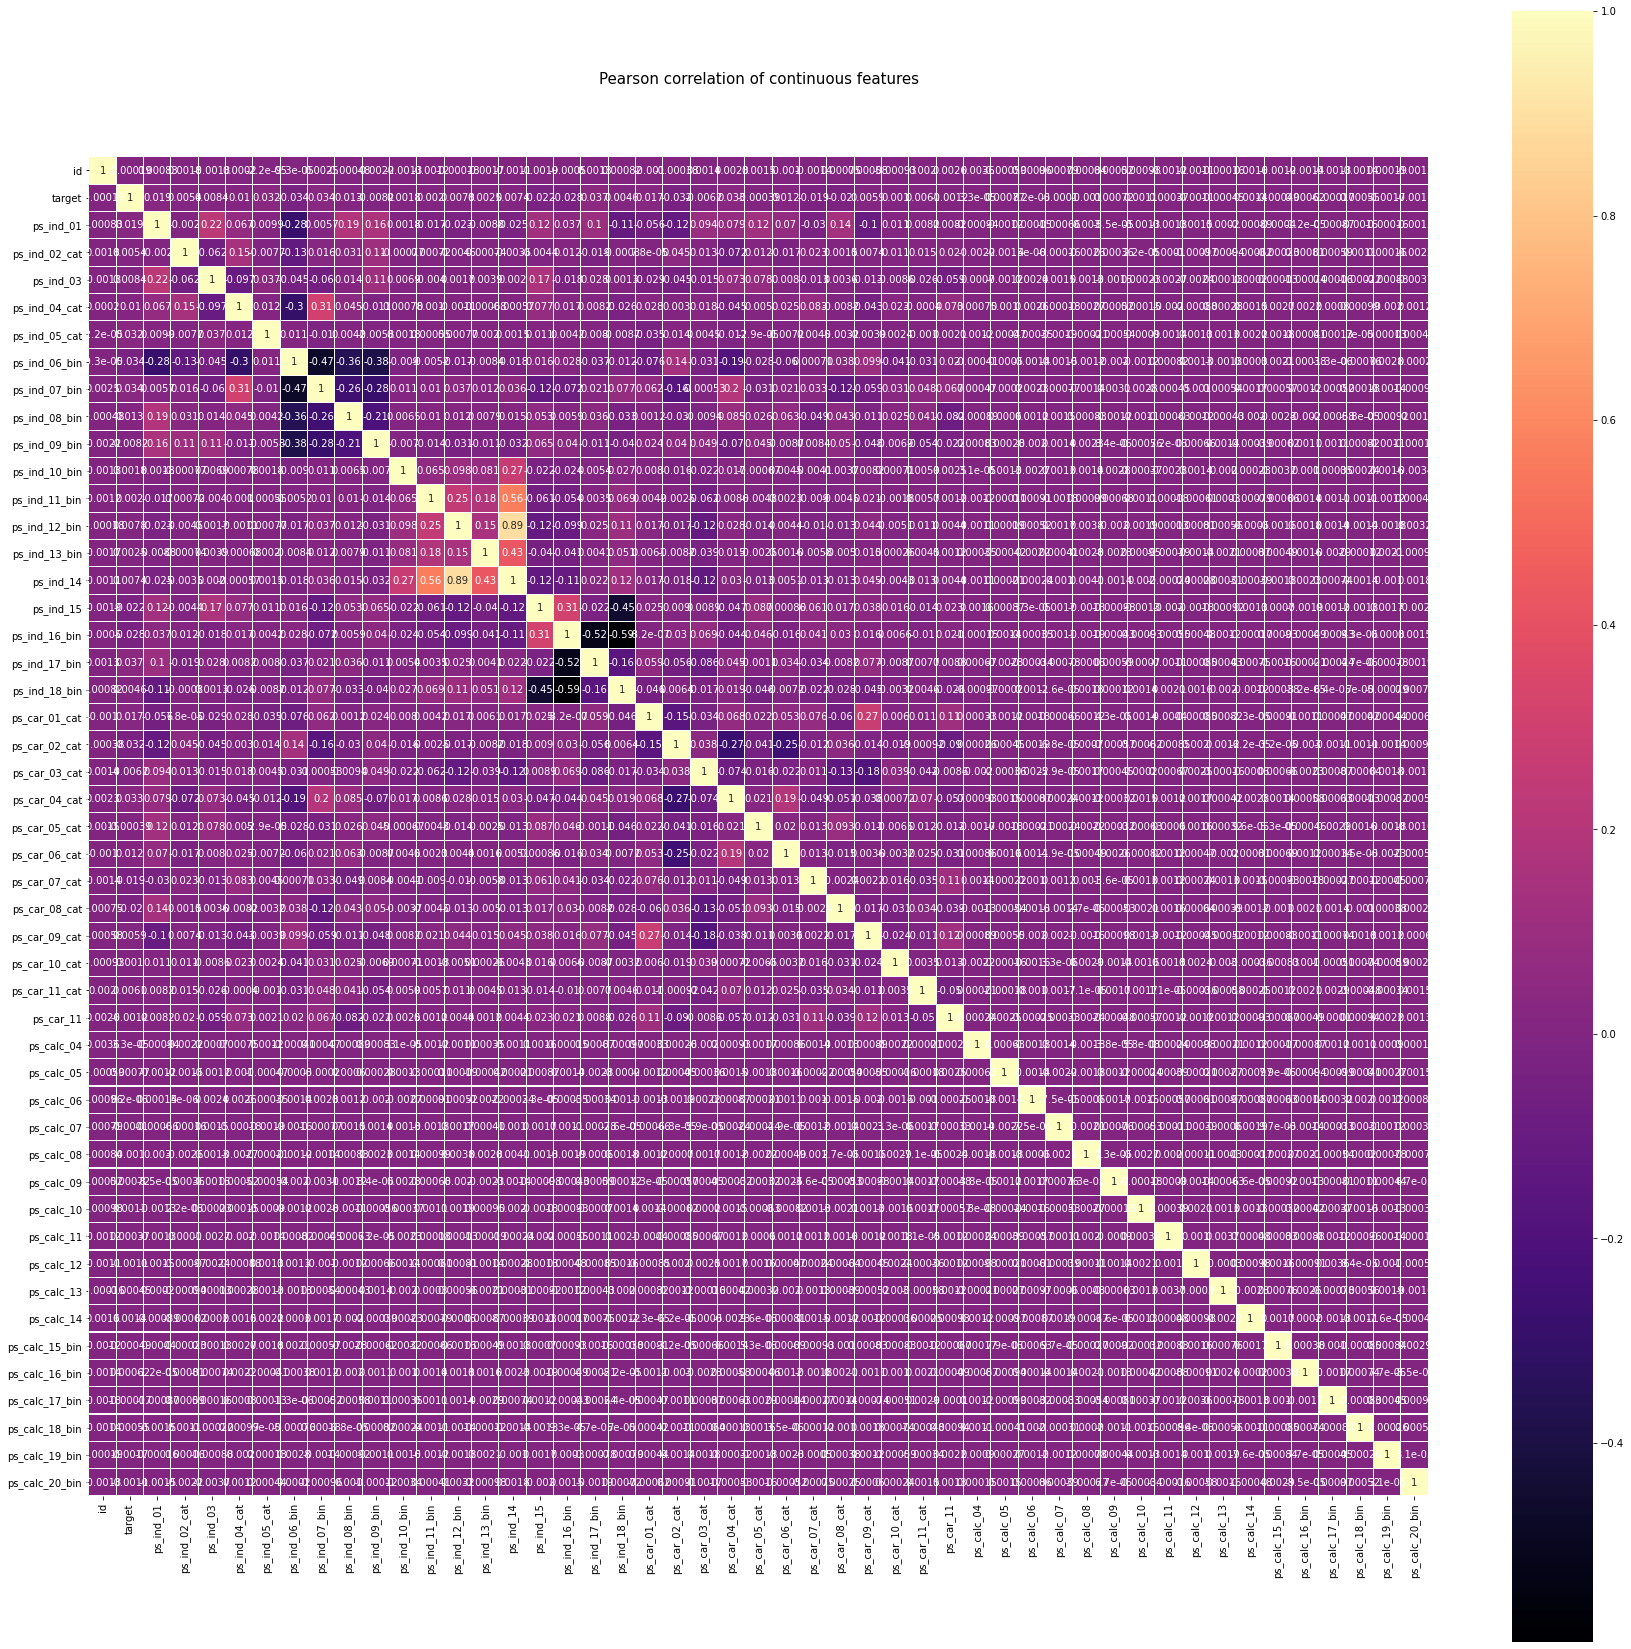

In [ ]:
colormap = plt.cm.magma
plt.figure(figsize=(30,30))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(data_int.corr(method='pearson'),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

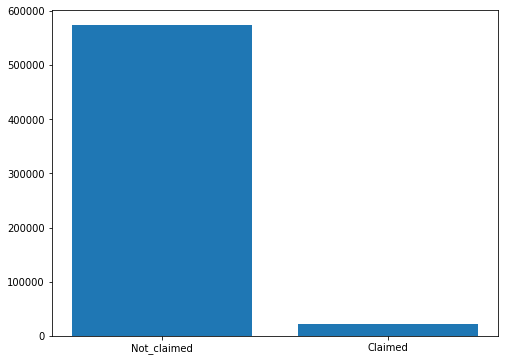

In [ ]:
plt.figure(figsize=(8,6))
Insurance = ['Not_claimed','Claimed']
Number = [a[0],a[1]]
plt.bar(Insurance,Number)
plt.show()

**1) Write at least 3 important inferences from the data above**

* The dataset is highly imbalanced.

* High Imbalance distribution between Class 0 and Class 1 datapoints. (96.355 : 3.644 )

* This means accuracy will not be a correct parameter to measure the performance of this model.

* There are some features that show negative correlation, Not highly correlated,Positive correlation is also very rare and weak. Most of the features are independent features.

**2) Is the data balanced? Meaning are targets 0 and 1 in the right proportion?**

Target value 0 is 96.35% and value 1 is 3.64%. This shows that data is highly imbalanced.

**3) How many Categorical features are there?**

24

In [ ]:
bool_cols = [col for col in data_int 
             if np.isin(data_int[col].dropna().unique(), [0, 1]).all()]

In [ ]:
Total_int_features = len(data_int.columns)

In [ ]:
print('Number of Categorical including ordinal features and excluding target variable & Id:', (Total_int_features - (len(bool_cols)+1)))

Number of Categorical including ordinal features and excluding target variable & Id: 24


**4) How Many Binary Features are there?**

23

In [ ]:
print('Number of Binary features:', (len(bool_cols)-1))

Number of Binary features: 23


**5) Write inferences from data on interval variables, 6) ordinal variables and on 7) binary variables.**

Inference that we can draw from interval variables is the relationship between ps_car_12 and ps_car_14 is very high whether it is linear or non-linear.

Highly correlated features are:

ps_reg_02 , ps_reg_03

ps_car_13 , ps_car_12

ps_car_14 , ps_car_12

Inference that we can draw from ordinal variables is it seems that most of ordinal features doesn't have much correlation between two features but they do have correlation between them and binary variables but still in the majority of dataset having ordinal features the value of correlation(rho) is close to zero which means features aren't correlated.

As in this dataset most of the features aren't correlated with each other, this is the same case with binary features.

Negative Correlated features:

ps_ind_06_bin

ps_ind_06_bin

ps_ind_06_bin

ps_ind_07_bin

ps_ind_08_bin

ps_ind_16_bin

ps_ind_17_bin

ps_ind_18_bin

Positive Correlated Features :

ps_ind_12_bin

ps_ind_11_bin

ps_ind_13_bin

**8) Check if the target data is proportionate or not.**

Data is not at all balanced (96.355 : 3.644)

**9) What should be the preferred way in this case to balance the data?**

Using resampling method which includes under-sampling(where we reduce the abundant class) and over-sampling(where we increase the rare class). 

There is no particular preferance or advantage of one resampling method over the other but since there should be no compromise with the length of dataset, over-sampling method will be used in this case.

In [ ]:
Y = data['target']
X = data.drop('target',axis=1)

**Using SMOTE (Synthetic Minority Over-sampling Technique) to balance the data**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(sampling_strategy=0.12,random_state=42)
X_res,Y_res = sm.fit_resample(X,Y)

In [ ]:
print('Resampled dataset shape %s' % Counter(Y_res))

Resampled dataset shape Counter({0: 573518, 1: 68822})


**10) How many training records are there after achieving a balance of 12%?**

In [ ]:
print('number of training records:', len(Y_res))

number of training records: 642340


**11) Which are the top two features in terms of missing values?**

The two features having maximum number of missing values are ps_car_03_cat and ps_car_05_cat.

**12) In total,how many features have missing values?**

There are a total of 12 features which contains missing values.

**13) What steps should be taken to handle the missing data?**

Fill the missing values according to the features present in the dataset. 

In case of interval features, fill the missing values with the mean of the data and in case of categorical and binary features used the method of gap (where every value gets filled by previous) and mode to fill in the missing values.


**14) Which interval variables have strong correlation?**

The majority of the features display zero or no relation to one another, meaning most are independant features. 

The features that display a strong linear correlation are:

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_12, ps_car_14)

**15) What's the level of correlation among ordinal features?**

Most of ordinal features doesn't have much correlation between two features but they do have correlation between them and binary variables but still In majority of dataset having ordinal features the value of correlation(rho) is close to zero which means features aren't correlated.

**16) Implement Hot Encoding for categorical features**

In [ ]:
c2 = []
for c in data_int.columns:
        if data_int[c].nunique()>2 :
            c2.append(c)

In [ ]:
c2.remove('id')

In [ ]:
data_OHO = pd.get_dummies(data_int, columns=c2)

In [ ]:
data_OHO.shape

(595212, 379)

**17) In nominal and interval features,which features are suitable for StandardScaler?**

There are two methods for feature scaling i.e 
Standardization(StandardScaler) and Normalization(MinMaxScaler) 

Feature scaling is a crucial aspect as part of the project lifecycle because with every dataset different features can be of different ranges and some machine learning model does outweigh smaller numbers(in terms of magnitude) in comparison with higher numbers(in terms of magnitude).

Formula for Normalization - (X - Xmin)/(Xmax - Xmin) 

It converts every value present in the dataframe in the range of 0 to 1 where maximum value beinb represented as 1 and minimum value 0. So, we can use Normalization under any type of features whether it is categorical, binary or Interval because it doesn't change to value of binary features which are nothing but 0 or 1

Formula for Stadardization - (X - Xmean)/(Xstd) 

It transforms the mean of the entire data to be zero and standard deviation to be 1. We should use standardization under interval or categorical but not with binary features because it changes the value of binary features from 0 or 1 to a different value in the range -1 to 1.

 **Implementing standard scaler to the interval features**

In [ ]:
data_float_std = (data_float - data_float.mean())/(data_float.std())

In [ ]:
# Joining dataframes

data_clean = data_int.join(data_float)
data_clean_std = data_int.join(data_float_std)
data_clean_OHO = data_OHO.join(data_float)
data_clean_OHO_std = data_OHO.join(data_float_std)

In [ ]:
print(data_clean.shape)
print(data_clean_std.shape)
print(data_clean_OHO.shape)
print(data_clean_OHO_std.shape)

(595212, 59)
(595212, 59)
(595212, 389)
(595212, 389)


**18) Summarize the learnings of extrapolatory data analysis?**

* The target value is heavily imbalanced in the approximate ratio of 24:1 and also after looking at correlation matrix of both the datas i.e integer type and float type, the outcome that came out is majority of features aren't correlated with each other, Specially target feature. The value of RHo for target feature with any other feature is approximately equal to 0, Only a few binary features and interval features are inter related (positive and negative correlation).

* There are also missing values present in the dataset to be precise there are exactly 12 features which has got missing values in it and there are only 2 features which has more than 30% of missing values in it. The missing values have been handled as shown in the notebook above.

* There are three types of features present in the dataset i.e categorical , binary and Interval (float) and it is very important to handle these three features differently which has been done above.



**Data modeling**

**1) The Simple LogisticRegression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?**

By implementing Logistic Regression as showm below we get an accuracy of 96.29% which is considered to be good but in this case the accuracy is a wrong parameter to use because the dataset is hugely imbalanced. 

The Logistic Regression model is basically classifying every value to be 0 and thereby getting an accuracy of 96.31% which is not the right measure considering the imbalace distribution in the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

Y_clean = data_clean['target']
X_clean = data_clean.drop(['target','id'],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_clean,Y_clean,test_size=0.2,random_state=42)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = logreg.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.9631645707853465


In [ ]:
print(confusion_matrix(Y_test,Y_pred))

[[114658      0]
 [  4385      0]]


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



**2) Why do you think f1-score is 0.0?**

Formula to calculate f1-score = the harmonic mean of precision and recall

(2 precisionrecall) / (precisionrecall)

f1-score of this model is 0.0 because this model is classifying all the values to 0 not 1 and due to imbalanced distribution of the data, the accuracy is  good but f1-score is 0

**3) What is the precision and recall score for the model?**

Precision = True Positive/(True Positive + False Positive)

Recall = True Positive/(True Positive + False Negative)

           precision    recall  

       0       0.96      1.00      
       1       0.00      0.00     
  macro avg    0.48      0.50

**4) What is the most important inference you can draw from the result?**

The most important inference that can be drawn from this model is that though the model accuracy is good (96.29%) the model is performing poorly mainly because it is classifying every value to be 0. 

To handle this problem of accuracy in imbalanced data we can refer the f1-score and by oberving f1-score we can see that the f1-score for 0 and 1 are far away from each other and the f1-score for 1 is 0. So, overall we can say that this model is performing poorly on the basis of F1 score as accuracy is not the correct measure in this case.

The best way possible to improve this model is by oversampling to overcome the problem of imbalanced data and also use normalization technique to normalize all the features.

In [ ]:
#OverSampling Using SMOTE (Synthetic Minority Over-sampling Technique)
seed=100
k=1
sm1 = SMOTE(sampling_strategy='auto',k_neighbors=k,random_state=seed)
X_resample,Y_resample = sm1.fit_resample(X_clean,Y_clean)

NameError: ignored

In [ ]:
print('Resampled dataset shape %s' % Counter(Y_resample))

Resampled dataset shape Counter({0: 573518, 1: 573518})


In [ ]:
X_train_res,X_test_res,Y_train_res,Y_test_res = train_test_split(X_resample,Y_resample,test_size=0.2,random_state=42)

In [ ]:
logreg.fit(X_train_res,Y_train_res)
Y_pred_res = logreg.predict(X_test_res)

In [ ]:
print(accuracy_score(Y_test_res,Y_pred_res))

0.5854067861626447


In [ ]:
confusion_matrix(Y_test_res,Y_pred_res)

array([[70117, 44798],
       [50313, 64180]])

In [ ]:
print(classification_report(Y_test_res,Y_pred_res))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60    114915
           1       0.59      0.56      0.57    114493

    accuracy                           0.59    229408
   macro avg       0.59      0.59      0.59    229408
weighted avg       0.59      0.59      0.59    229408



**5) What is the accuracy score and f1-score for the improved Logistic Regression model?**

Accuracy score - 58.54% 

Average f1-score - 0.59

**6) Why do you think f1-score has improved?**

Average f1-score has improved because of the over sampling that has been implemented to the dataset. Now the dataset is more balanced and the drawback of oversampling being the accuracy of the model has come down from 96% to 58%

**7) For model LinearSVC play with parameters –dual, max_iter and see if there is any improvement ?**

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(dual=False,max_iter=50)
svm.fit(X_train_res,Y_train_res)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=50,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
Y_pred_svm = svm.predict(X_test_res)

In [ ]:
accuracy_score(Y_test_res,Y_pred_svm)

0.5871198911982145

In [ ]:
confusion_matrix(Y_test_res,Y_pred_svm)

array([[70349, 44566],
       [50152, 64341]])

In [ ]:
print(classification_report(Y_test_res,Y_pred_svm))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60    114915
           1       0.59      0.56      0.58    114493

    accuracy                           0.59    229408
   macro avg       0.59      0.59      0.59    229408
weighted avg       0.59      0.59      0.59    229408



After tuning the values of dual and max_iter can't see any improvement in accuracy as well as F1 score.

Accuracy - 58.7%  

f1-score - 0.59

**8) For - SVC with Imbalance Check & Feature Optimization & only 100K Record. Is there improvement in scores?**

In [ ]:
Y_clean_std = data_clean_std['target']
X_clean_std = data_clean_std.drop(['target','id'],axis=1)
X_svc = X_clean_std[0:100000]
Y_svc = Y_clean_std[0:100000]

In [ ]:
#Feature Optimization Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_svc)
X_svc_pca = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3','PC 4','PC 5'])

In [ ]:
X_train_svc,X_test_svc,Y_train_svc,Y_test_svc = train_test_split(X_svc_pca,Y_svc,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
svm1 = SVC(kernel='linear',class_weight='balanced',max_iter=75)
svm1.fit(X_train_svc,Y_train_svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=75, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred_svc = svm1.predict(X_test_svc)

In [ ]:
accuracy_score(Y_test_svc,Y_pred_svc)

0.7434

In [ ]:
confusion_matrix(Y_test_svc,Y_pred_svc)

array([[14684,  4596],
       [  536,   184]])

In [ ]:
print(classification_report(Y_test_svc,Y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     19280
           1       0.04      0.26      0.07       720

    accuracy                           0.74     20000
   macro avg       0.50      0.51      0.46     20000
weighted avg       0.93      0.74      0.82     20000



Using SVC with imbalance check and feature optimization using PCA there is an improvement in accuracy from 58.8% to 74.35% and the f1-score for class 1 has also increased from 0.00(without imbalance check) to 0.07(with imbalance check)

**9) XGBoost is one of the better classifiers --but still f1-score is very low. What could be the reason?**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred_xgb = xgb.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred_xgb)

0.9631645707853465

In [ ]:
confusion_matrix(Y_test,Y_pred_xgb)

array([[114658,      0],
       [  4385,      0]])

In [ ]:
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



The main focus of XG Boost (extreme gradient boosting algorithm) is to improve the accuracy of the model and also improve computation time. 

As we can see the accuracy of the model using XG boost is high 96.31%, but the f1-score is not good / fairly innaccurate in terms of usuability because of the severe imbalance distribution in the dataset. 

**10) What is the increase in number of features after one-hotencoding of the data?**

330

In [ ]:
a = data_clean_OHO.shape
b = data_clean.shape
print('Increase in number of features after one-hot encoding:', (a[1] - b[1]))

Increase in number of features after one-hot encoding: 330


**11) Is there any improvement in scores after encoding?**

In [ ]:
Y_clean_OHO = data_clean_OHO['target']
X_clean_OHO = data_clean_OHO.drop(['target','id'],axis=1)

In [ ]:
#OverSampling Using SMOTE(Synthetic Minority Over-sampling Technique)
X_resample_OHO,Y_resample_OHO = sm1.fit_resample(X_clean_OHO,Y_clean_OHO)